In [1]:
!pip install catboost

     |████████████████████████████████| 65.8MB 44kB/s 


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Metrics
import sklearn.metrics as metrics

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [3]:
train_new = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_data_final.xlsx')
test_new = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_data_final.xlsx')
display(train_new.head())
display(test_new.head())
print(train_new.shape)
print(test_new.shape)

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,49,35833.33,464993,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,23,666.67,466001,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060,127335,69.77,39,45257.00,462030,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,24,20833.33,473335,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,56,27313.67,495442,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,2,46,480000,365000.0,365000.0,1000.0,1046,22354,75.83,50,32069.00,473001,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,45,480000,285000.0,285000.0,9300.0,1046,22354,57.44,35,25000.00,473001,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,48,580000,400000.0,400000.0,35800.0,1060,65929,68.97,37,23333.33,473001,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,154,36,725000,500000.0,500000.0,52000.0,1049,68597,61.79,55,91666.67,493558,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,194,48,617000,400000.0,400000.0,35400.0,1049,38493,59.09,48,12500.00,754137,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


(128654, 50)
(14745, 49)


#### Feature Selection

Multivariate Correlation -  Independent and Dependent Features

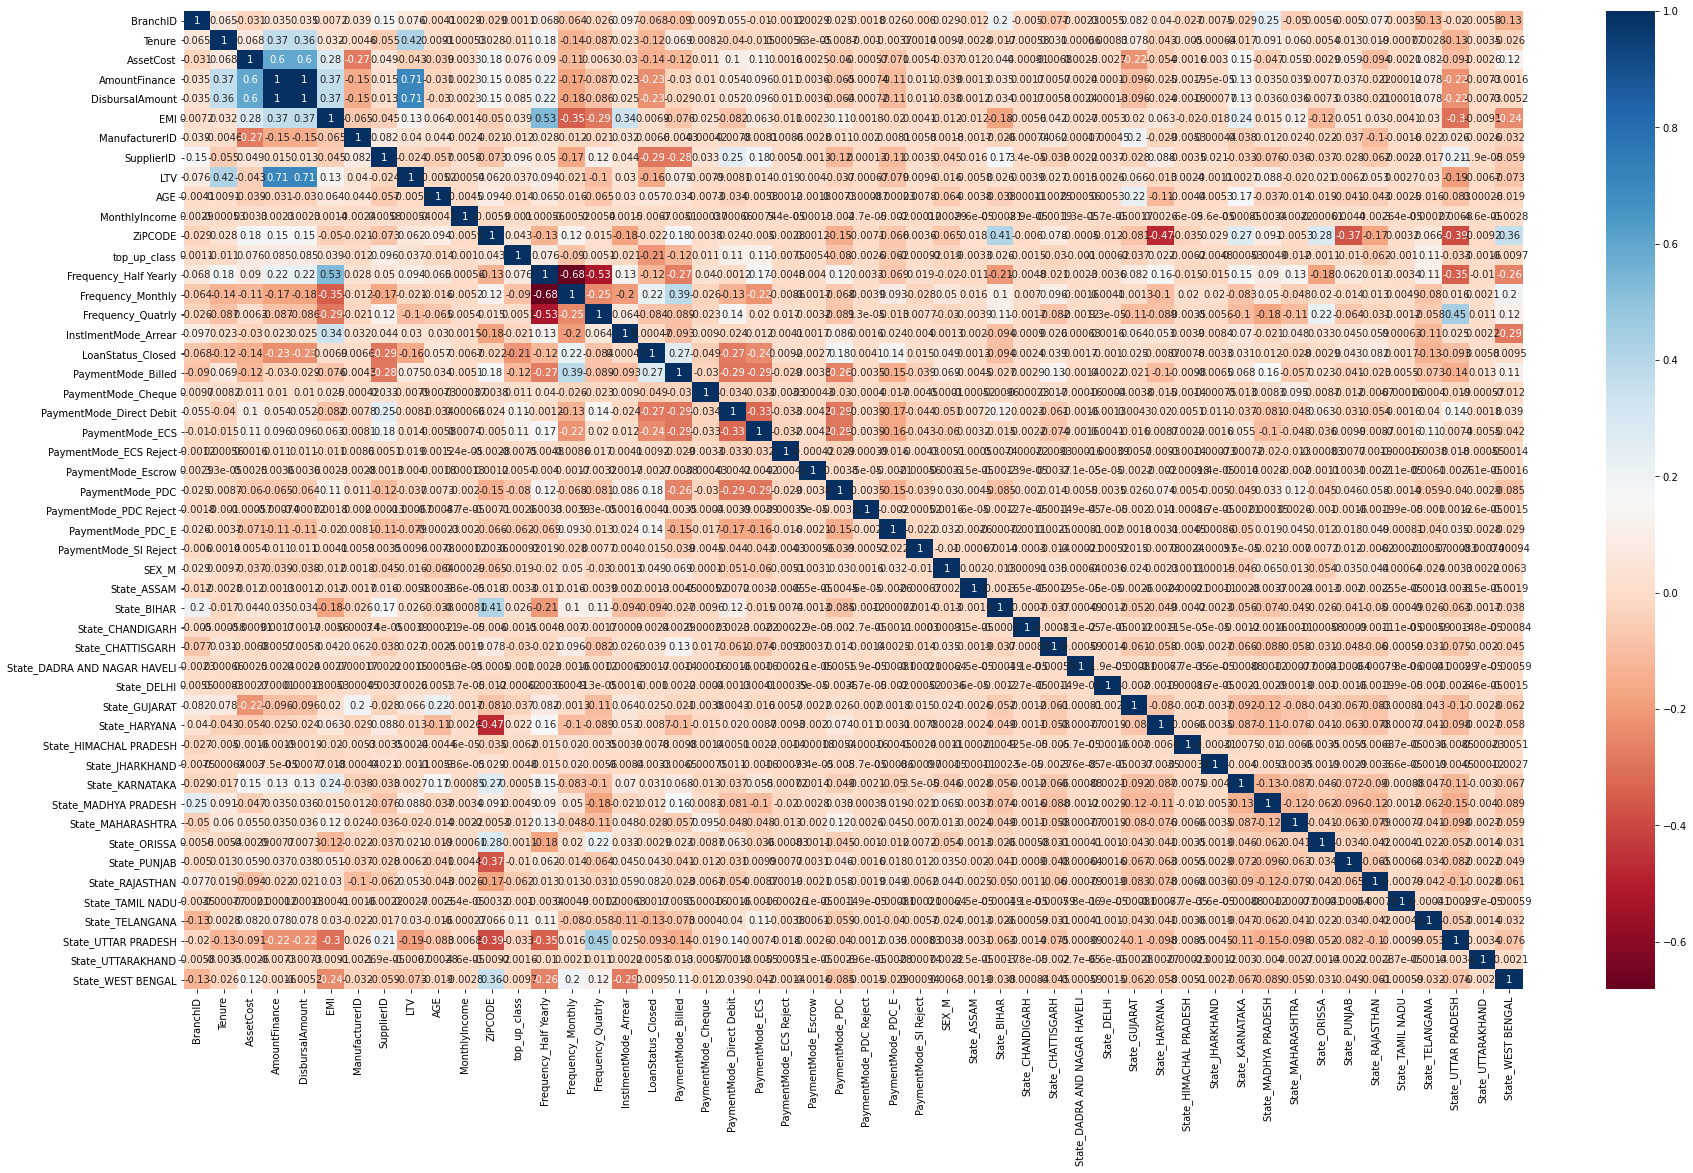

In [4]:
dataset = train_new.copy()
plt.figure(figsize=(30, 18))
sns.heatmap(dataset.corr(),annot=True,cmap='RdBu')
plt.show()


Visualizing Each Feature with Dependent Feature in better way

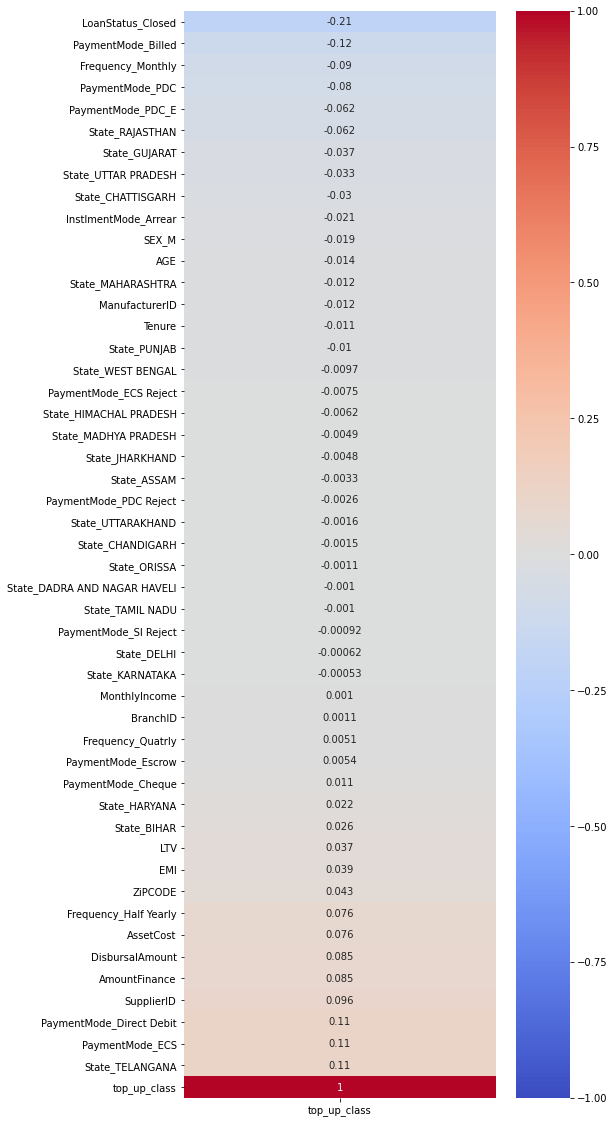

In [5]:
plt.figure(figsize=(7, 20))
sns.heatmap(dataset.corr()[['top_up_class']].sort_values(by='top_up_class'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 

Correlation between Independent features

In [6]:
dataset_only_independent = dataset.copy()
dataset_only_independent = dataset_only_independent.drop(['top_up_class'],axis=1)
dataset_only_independent.head(2)

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,49,35833.33,464993,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,23,666.67,466001,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [7]:
def high_correlation_train_set_indpendent(dataset,threshold):
    col_corr = set() #Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # It also consider -ve corr - You can remove abs() - If you dont wont to consider -ve corr
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

### These function return correlated features which are to be removed , Becaause they are correlated with any other feature

In [8]:
corr_features = high_correlation_train_set_indpendent(dataset_only_independent,0.7)
corr_features

{'DisbursalAmount', 'LTV'}

##### Feature Selection/Importance Techniques

For now, we have a rough idea of variables that are positively and negatively correlated with the target feature. To make final decision, which variables from highly correlated we will use for our model, we need to access the strength of the "true" correlation between predictors

#### 1. Extra Trees Classifier Technique - Feature Importance

In [9]:
y_og_values = dataset['top_up_class']
y_og_values.head()

0    1
1    0
2    6
3    1
4    2
Name: top_up_class, dtype: int64

In [10]:
model_feature_Selection = ExtraTreesClassifier()
model_feature_Selection.fit(dataset_only_independent,y_og_values)
print(model_feature_Selection.feature_importances_)

[5.33671673e-02 5.97748214e-02 8.13765094e-02 7.51909796e-02
 7.52819730e-02 8.67818490e-02 5.30869258e-02 7.14273489e-02
 8.76080499e-02 8.83989663e-02 9.37742399e-02 8.72261293e-02
 3.17057559e-03 2.90580697e-03 2.89499210e-03 4.05106500e-03
 1.34527051e-02 3.08917447e-03 6.95719817e-04 5.53968907e-03
 5.33134510e-03 8.14530845e-04 4.88997157e-05 3.40454985e-03
 2.48287927e-06 2.36776105e-03 1.16877119e-03 8.02326644e-03
 3.44194748e-06 1.10117044e-03 5.06639120e-07 2.26358115e-03
 7.96030598e-07 1.98412140e-05 2.13001417e-03 1.66566691e-03
 5.80789534e-05 1.01251813e-05 2.85510700e-03 3.33099385e-03
 2.44963753e-03 1.12604581e-03 1.71951650e-03 2.32412871e-03
 3.40913320e-07 4.74251973e-03 2.52887787e-03 4.23072824e-05
 1.37100709e-03]


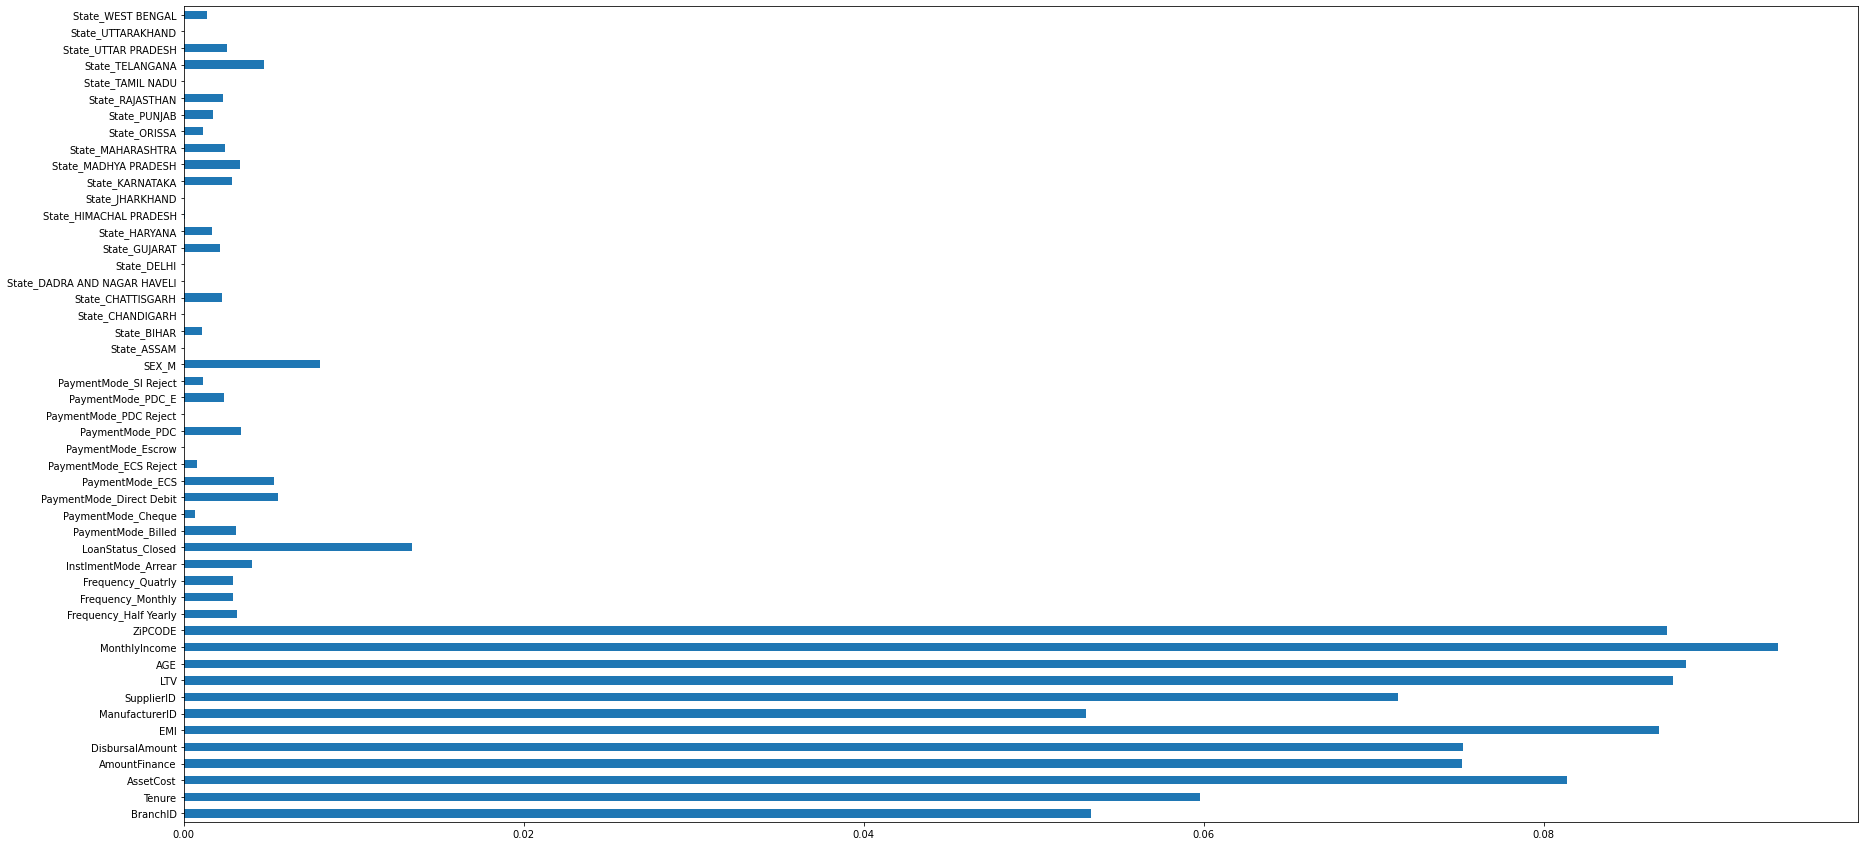

In [11]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_feature_Selection.feature_importances_, index=dataset_only_independent.columns)
fig=plt.figure(figsize=[30,15])
feat_importances.plot(kind='barh')
plt.show()

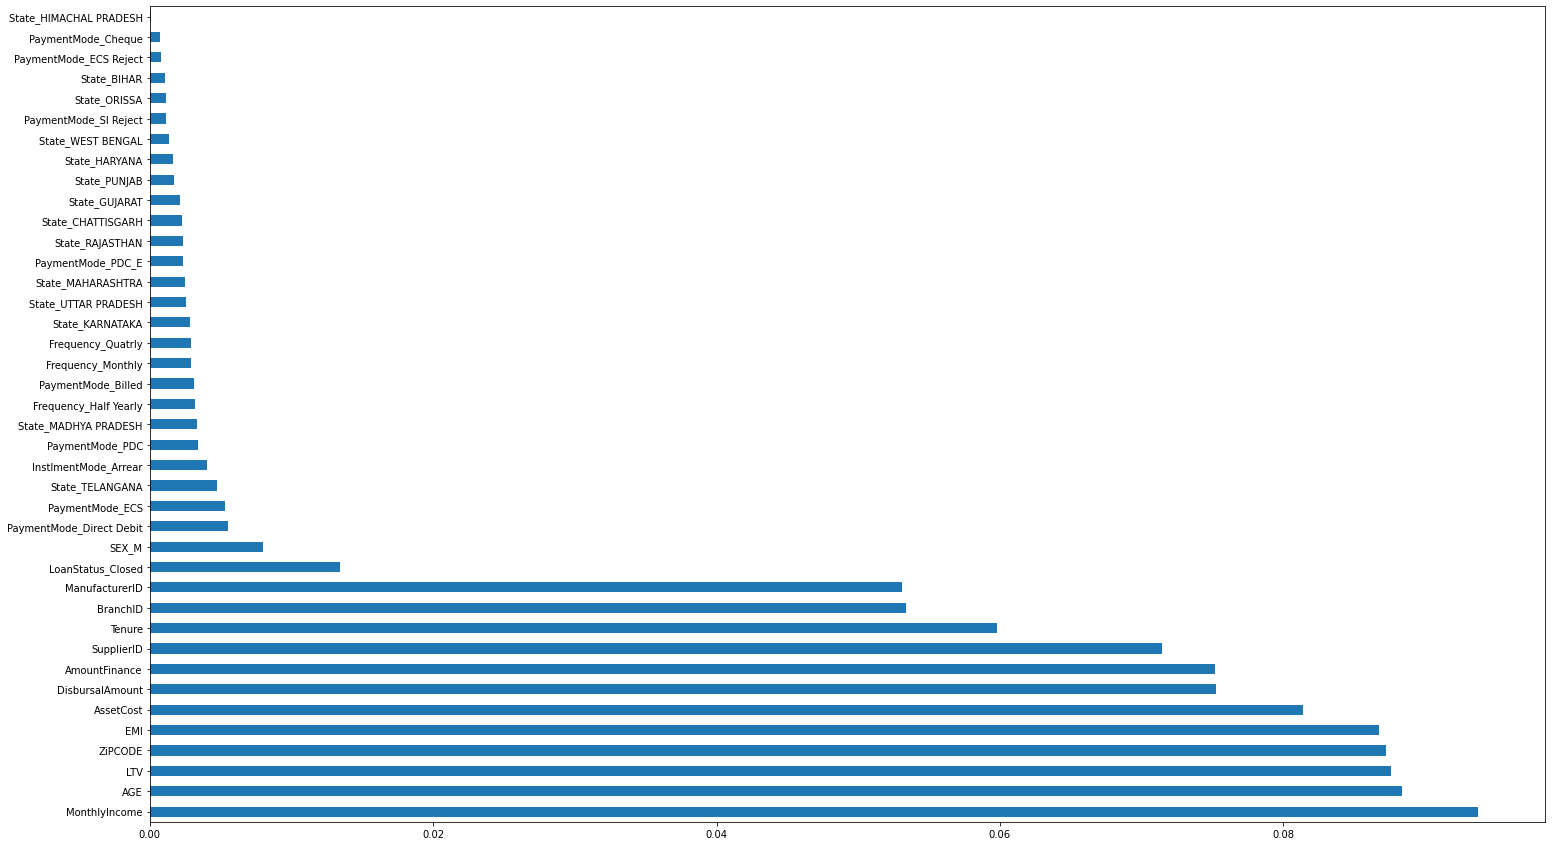

In [12]:
feat_importances = pd.Series(model_feature_Selection.feature_importances_, index=dataset_only_independent.columns)
fig=plt.figure(figsize=[25,15])
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

In [13]:
feat_importances.nlargest(40)

MonthlyIncome               0.093774
AGE                         0.088399
LTV                         0.087608
ZiPCODE                     0.087226
EMI                         0.086782
AssetCost                   0.081377
DisbursalAmount             0.075282
AmountFinance               0.075191
SupplierID                  0.071427
Tenure                      0.059775
BranchID                    0.053367
ManufacturerID              0.053087
LoanStatus_Closed           0.013453
SEX_M                       0.008023
PaymentMode_Direct Debit    0.005540
PaymentMode_ECS             0.005331
State_TELANGANA             0.004743
InstlmentMode_Arrear        0.004051
PaymentMode_PDC             0.003405
State_MADHYA PRADESH        0.003331
Frequency_Half Yearly       0.003171
PaymentMode_Billed          0.003089
Frequency_Monthly           0.002906
Frequency_Quatrly           0.002895
State_KARNATAKA             0.002855
State_UTTAR PRADESH         0.002529
State_MAHARASHTRA           0.002450
P

In [14]:
feat_importances.nlargest(40).index

Index(['MonthlyIncome', 'AGE', 'LTV', 'ZiPCODE', 'EMI', 'AssetCost',
       'DisbursalAmount', 'AmountFinance', 'SupplierID', 'Tenure', 'BranchID',
       'ManufacturerID', 'LoanStatus_Closed', 'SEX_M',
       'PaymentMode_Direct Debit', 'PaymentMode_ECS', 'State_TELANGANA',
       'InstlmentMode_Arrear', 'PaymentMode_PDC', 'State_MADHYA PRADESH',
       'Frequency_Half Yearly', 'PaymentMode_Billed', 'Frequency_Monthly',
       'Frequency_Quatrly', 'State_KARNATAKA', 'State_UTTAR PRADESH',
       'State_MAHARASHTRA', 'PaymentMode_PDC_E', 'State_RAJASTHAN',
       'State_CHATTISGARH', 'State_GUJARAT', 'State_PUNJAB', 'State_HARYANA',
       'State_WEST BENGAL', 'PaymentMode_SI Reject', 'State_ORISSA',
       'State_BIHAR', 'PaymentMode_ECS Reject', 'PaymentMode_Cheque',
       'State_HIMACHAL PRADESH'],
      dtype='object')

In [15]:
imp_features_for_model = list(feat_importances.nlargest(40).index)
imp_features_for_model

['MonthlyIncome',
 'AGE',
 'LTV',
 'ZiPCODE',
 'EMI',
 'AssetCost',
 'DisbursalAmount',
 'AmountFinance',
 'SupplierID',
 'Tenure',
 'BranchID',
 'ManufacturerID',
 'LoanStatus_Closed',
 'SEX_M',
 'PaymentMode_Direct Debit',
 'PaymentMode_ECS',
 'State_TELANGANA',
 'InstlmentMode_Arrear',
 'PaymentMode_PDC',
 'State_MADHYA PRADESH',
 'Frequency_Half Yearly',
 'PaymentMode_Billed',
 'Frequency_Monthly',
 'Frequency_Quatrly',
 'State_KARNATAKA',
 'State_UTTAR PRADESH',
 'State_MAHARASHTRA',
 'PaymentMode_PDC_E',
 'State_RAJASTHAN',
 'State_CHATTISGARH',
 'State_GUJARAT',
 'State_PUNJAB',
 'State_HARYANA',
 'State_WEST BENGAL',
 'PaymentMode_SI Reject',
 'State_ORISSA',
 'State_BIHAR',
 'PaymentMode_ECS Reject',
 'PaymentMode_Cheque',
 'State_HIMACHAL PRADESH']

In [16]:
train_new = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_data_final.xlsx')
test_new = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_data_final.xlsx')
display(train_new.head())
display(test_new.head())
print(train_new.shape)
print(test_new.shape)

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,49,35833.33,464993,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,23,666.67,466001,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060,127335,69.77,39,45257.00,462030,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,24,20833.33,473335,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,56,27313.67,495442,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,2,46,480000,365000.0,365000.0,1000.0,1046,22354,75.83,50,32069.00,473001,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,45,480000,285000.0,285000.0,9300.0,1046,22354,57.44,35,25000.00,473001,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,48,580000,400000.0,400000.0,35800.0,1060,65929,68.97,37,23333.33,473001,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,154,36,725000,500000.0,500000.0,52000.0,1049,68597,61.79,55,91666.67,493558,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,194,48,617000,400000.0,400000.0,35400.0,1049,38493,59.09,48,12500.00,754137,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


(128654, 50)
(14745, 49)


In [17]:
train_new_imp_features = train_new[['top_up_class']+imp_features_for_model]
train_new_imp_features

,top_up_class,MonthlyIncome,AGE,LTV,ZiPCODE,EMI,AssetCost,DisbursalAmount,AmountFinance,SupplierID,Tenure,BranchID,ManufacturerID,LoanStatus_Closed,SEX_M,PaymentMode_Direct Debit,PaymentMode_ECS,State_TELANGANA,InstlmentMode_Arrear,PaymentMode_PDC,State_MADHYA PRADESH,Frequency_Half Yearly,PaymentMode_Billed,Frequency_Monthly,Frequency_Quatrly,State_KARNATAKA,State_UTTAR PRADESH,State_MAHARASHTRA,PaymentMode_PDC_E,State_RAJASTHAN,State_CHATTISGARH,State_GUJARAT,State_PUNJAB,State_HARYANA,State_WEST BENGAL,PaymentMode_SI Reject,State_ORISSA,State_BIHAR,PaymentMode_ECS Reject,PaymentMode_Cheque,State_HIMACHAL PRADESH
0,1,35833.33,49,61.11,464993,24000.0,450000,275000.0,275000.0,21946,48,1,1568,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,666.67,23,70.00,466001,10500.0,485000,350000.0,350000.0,34802,47,333,1062,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,45257.00,39,69.77,462030,38300.0,690000,519728.0,519728.0,127335,68,1,1060,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,20833.33,24,80.92,473335,11600.0,480000,400000.0,400000.0,25094,48,125,1060,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,27313.67,56,71.05,495442,15000.0,619265,440000.0,440000.0,21853,44,152,1046,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,3,65333.33,25,40.17,131403,76800.0,470000,265601.0,265601.0,48879,24,424,1568,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
128650,0,83333.33,25,59.92,131403,80100.0,460000,275630.0,275630.0,48879,24,424,1568,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
128651,0,248500.00,36,52.38,131024,15277.0,545000,300733.0,300733.0,44118,23,424,1568,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
128652,0,84500.00,37,50.37,131103,74341.0,350000,250962.0,250962.0,48879,35,424,1568,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [18]:
test_new_imp_features = test_new[imp_features_for_model]
test_new_imp_features

,MonthlyIncome,AGE,LTV,ZiPCODE,EMI,AssetCost,DisbursalAmount,AmountFinance,SupplierID,Tenure,BranchID,ManufacturerID,LoanStatus_Closed,SEX_M,PaymentMode_Direct Debit,PaymentMode_ECS,State_TELANGANA,InstlmentMode_Arrear,PaymentMode_PDC,State_MADHYA PRADESH,Frequency_Half Yearly,PaymentMode_Billed,Frequency_Monthly,Frequency_Quatrly,State_KARNATAKA,State_UTTAR PRADESH,State_MAHARASHTRA,PaymentMode_PDC_E,State_RAJASTHAN,State_CHATTISGARH,State_GUJARAT,State_PUNJAB,State_HARYANA,State_WEST BENGAL,PaymentMode_SI Reject,State_ORISSA,State_BIHAR,PaymentMode_ECS Reject,PaymentMode_Cheque,State_HIMACHAL PRADESH
0,32069.00,50,75.83,473001,1000.0,480000,365000.0,365000.0,22354,46,2,1046,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,25000.00,35,57.44,473001,9300.0,480000,285000.0,285000.0,22354,45,2,1046,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23333.33,37,68.97,473001,35800.0,580000,400000.0,400000.0,65929,48,2,1060,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,91666.67,55,61.79,493558,52000.0,725000,500000.0,500000.0,68597,36,154,1049,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,12500.00,48,59.09,754137,35400.0,617000,400000.0,400000.0,38493,48,194,1049,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,33333.33,39,79.17,122001,14723.0,530016,419616.0,419616.0,22094,35,143,1046,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14741,33333.33,39,75.04,560020,15491.0,595000,446500.0,446500.0,61196,36,32,2721,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14742,33333.33,39,75.04,560020,15491.0,595000,446500.0,446500.0,61196,36,32,2721,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14743,33333.33,39,70.00,335001,25350.0,400000,280000.0,280000.0,63565,12,246,1046,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
y = train_new_imp_features['top_up_class']
X = train_new_imp_features.drop('top_up_class',axis=1)
print(X.shape,y.shape)

(128654, 40) (128654,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 40) (25731, 40) (102923,) (25731,)


In [21]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)
test_new_st = sc.transform(test_new_imp_features)

In [38]:
estimators_st = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=1000)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators_st, X_train, y_train):
    for m in estimators_st:
        estimators_st[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators_st, X_train_st, y_train)

def mpredict(estimators_st, X_test_st, y_test):
    outcome = dict()
    for m in estimators_st:
        y_pred = estimators_st[m][0].predict(X_test_st)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome


outcome_st = mpredict(estimators_st, X_test_st, y_test)

for m in outcome_st:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome_st[m][0],4))
    print('Accuracy Score', round(outcome_st[m][1],4))
    print('Classification report \n ')
    print(outcome_st[m][2])
    print('\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------Logistic Regression------------------------
F1 Score 0.1303
Accuracy Score 0.8269
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     21279
           1       0.00      0.00      0.00      1642
           2       0.00      0.00      0.00       761
           3       0.00      0.00      0.00       683
           4       1.00      0.00      0.00       663
           5       0.17      0.00      0.00       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.28      0.14      0.13     25731
weighted avg       0.71      0.83      0.75     25731



------------------------KNN------------------------
F1 Score 0.1515
Accuracy Score 0.815
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     21279
           1       0.19      0.03      0.05    

#### Hyper parameter tunning

In [39]:
sc = StandardScaler()
X_st = sc.fit_transform(X)

In [40]:
f1 = metrics.make_scorer(metrics.f1_score,average='macro')

In [41]:
model_knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_knn = RandomizedSearchCV(estimator = model_knn, param_distributions = random_grid,scoring=f1, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)

rf_knn.fit(X_st,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 6.1min
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.1min remaining:    0.0s


[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 6.4min
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 5.6min
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 5.2min
[CV] weights=distance, n_neighbors=19, metric=manhattan ..............
[CV]  weights=distance, n_neighbors=19, metric=manhattan, total= 5.0min
[CV] weights=distance, n_neighbors=1, metric=minkowski ...............
[CV]  weights=distance, n_neighbors=1, metric=minkowski, total= 3.2min
[CV] weights=distance, n_neighbors=1, metric=minkowski ...............
[CV]  weights=distance, n_neighbors=1, metric=minkowski, total= 3.7min
[CV] weights=distance, n_neighbors=1, metric=minkowski ...............
[CV]  weights=distance, n_neighbors=1, metric=minkowski, total= 3.1min
[CV] weights=distance, n_neighbors=1, metric=minkowski ...............
[C

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 212.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 21, 2),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(f1_score, average=macro), ve

In [42]:
rf_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}

In [22]:
model_knn_final = KNeighborsClassifier(n_neighbors=1 , weights ='distance' ,metric='minkowski')
model_knn_final = model_knn_final.fit(X_train_st,y_train)

y_pred = model_knn_final.predict(X_test_st)
print('------------------------KNN MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------KNN MODEL------------------------
F1 Score 0.19126882238863935
Accuracy Score 0.7138471104892931
Classification report 
 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     21279
           1       0.14      0.14      0.14      1642
           2       0.07      0.07      0.07       761
           3       0.10      0.11      0.11       683
           4       0.07      0.06      0.07       663
           5       0.09      0.08      0.08       502
           6       0.03      0.03      0.03       201

    accuracy                           0.71     25731
   macro avg       0.19      0.19      0.19     25731
weighted avg       0.71      0.71      0.71     25731





### Random Forest


In [ ]:
#Randomized Search CV

model_rf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring=f1, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)

rf_random.fit(X_st,y)

In [ ]:
rf_random.best_params_

In [23]:
model_rf_final = RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=5,min_samples_split=15,n_estimators=100)
model_rf_final = model_rf_final.fit(X_train_st,y_train)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.12992342452271372
Accuracy Score 0.8270179938595469
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     21279
           1       1.00      0.00      0.00      1642
           2       0.00      0.00      0.00       761
           3       0.33      0.00      0.00       683
           4       0.00      0.00      0.00       663
           5       0.00      0.00      0.00       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.31      0.14      0.13     25731
weighted avg       0.76      0.83      0.75     25731





/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting Classifier

In [ ]:
# define models and parameters
model_gbm = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9,12,15]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'subsample': subsample,
               'max_depth':max_depth}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
gbm_rs = RandomizedSearchCV(estimator = model_gbm, param_distributions = random_grid,scoring=f1, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)

gbm_rs.fit(X_st,y)

In [ ]:
gbm_rs.best_params_

In [ ]:
model_gbm_final = GradientBoostingClassifier()
model_gbm_final = model_gbm_final.fit(X_train_st,y_train)

y_pred = model_gbm_final.predict(X_test_st)
print('------------------------GBM MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

### Decsision Tree Classifier 

In [ ]:
model_dt = DecisionTreeClassifier()

criterion = ['gini', 'entropy']
max_depth = [5,10,15,20,25,30,35]

# Create the random grid
random_grid = {'criterion': criterion,
               'max_depth': max_depth}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
dt_rs = RandomizedSearchCV(estimator = model_dt, param_distributions = random_grid,scoring=f1, n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = 1)

dt_rs.fit(X_st,y)

In [45]:
dt_rs.best_params_

{'criterion': 'entropy', 'max_depth': 30}

In [25]:
model_dt_final = DecisionTreeClassifier(criterion='entropy',max_depth=30)
model_dt_final = model_dt_final.fit(X_train_st,y_train)

y_pred = model_dt_final.predict(X_test_st)
print('------------------------DT MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------DT MODEL------------------------
F1 Score 0.20186474952759445
Accuracy Score 0.6958921145699739
Classification report 
 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     21279
           1       0.13      0.15      0.14      1642
           2       0.08      0.09      0.08       761
           3       0.12      0.14      0.13       683
           4       0.11      0.11      0.11       663
           5       0.09      0.10      0.10       502
           6       0.02      0.03      0.03       201

    accuracy                           0.70     25731
   macro avg       0.20      0.21      0.20     25731
weighted avg       0.71      0.70      0.71     25731





### Combined Model

In [28]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=30)
knn = KNeighborsClassifier(n_neighbors=1 , weights ='distance' ,metric='minkowski')
rf=RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=5,min_samples_split=15,n_estimators=100)

Ens = VotingClassifier( 
    estimators= [('DecisionTreeClassifier',dt),('KNeighborsClassifier',knn),('RandomForestClassifier',rf)],voting='soft')

## Training the Ensemble learning:
Ens= Ens.fit(X_train_st , y_train)

y_pred = Ens.predict(X_test_st)
print('------------------------COMBINED MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------COMBINED MODEL------------------------
F1 Score 0.17825096915677638
Accuracy Score 0.8000854999805682
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     21279
           1       0.17      0.05      0.08      1642
           2       0.13      0.03      0.05       761
           3       0.15      0.05      0.08       683
           4       0.12      0.03      0.05       663
           5       0.17      0.05      0.07       502
           6       0.10      0.01      0.03       201

    accuracy                           0.80     25731
   macro avg       0.24      0.17      0.18     25731
weighted avg       0.72      0.80      0.75     25731





In [29]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=30)
knn = KNeighborsClassifier(n_neighbors=1 , weights ='distance' ,metric='minkowski')
rf=RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=5,min_samples_split=15,n_estimators=100)
xg=XGBClassifier()
gbm=GradientBoostingClassifier()

Ens = VotingClassifier( 
    estimators= [('DecisionTreeClassifier',dt),('KNeighborsClassifier',knn),('RandomForestClassifier',rf),('XGBClassifier',xg),('GBM',gbm)],voting='soft')

## Training the Ensemble learning:
Ens= Ens.fit(X_train_st , y_train)

y_pred = Ens.predict(X_test_st)
print('------------------------COMBINED MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------COMBINED MODEL------------------------
F1 Score 0.15194887218057299
Accuracy Score 0.8216159496327388
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     21279
           1       0.26      0.02      0.04      1642
           2       0.27      0.01      0.02       761
           3       0.18      0.02      0.04       683
           4       0.20      0.02      0.03       663
           5       0.19      0.01      0.02       502
           6       0.12      0.00      0.01       201

    accuracy                           0.82     25731
   macro avg       0.29      0.15      0.15     25731
weighted avg       0.73      0.82      0.75     25731





In [30]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=30)
knn = KNeighborsClassifier(n_neighbors=1 , weights ='distance' ,metric='minkowski')


Ens = VotingClassifier( 
    estimators= [('DecisionTreeClassifier',dt),('KNeighborsClassifier',knn)],voting='soft')

## Training the Ensemble learning:
Ens= Ens.fit(X_train_st , y_train)

y_pred = Ens.predict(X_test_st)
print('------------------------COMBINED MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------COMBINED MODEL------------------------
F1 Score 0.170450950813728
Accuracy Score 0.7985309548793285
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     21279
           1       0.15      0.05      0.07      1642
           2       0.13      0.04      0.06       761
           3       0.15      0.06      0.08       683
           4       0.10      0.02      0.03       663
           5       0.16      0.03      0.04       502
           6       0.05      0.00      0.01       201

    accuracy                           0.80     25731
   macro avg       0.22      0.16      0.17     25731
weighted avg       0.71      0.80      0.75     25731





### ANN

In [57]:
y_train_encc = tf.keras.utils.to_categorical(y_train, 7)
y_test_encc = tf.keras.utils.to_categorical(y_test, 7)

print(y_train_encc.shape,y_test_encc.shape)


(102923, 7) (25731, 7)


In [63]:

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 40))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 7, kernel_initializer = 'he_uniform',activation='softmax'))

# Compiling the ANN
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 50)                2050      
_________________________________________________________________
dense_41 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_42 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_43 (Dense)             (None, 7)                 357       
Total params: 4,982
Trainable params: 4,982
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train_st, y_train_encc,validation_split=0.20, batch_size = 10, epochs = 100)

Epoch 1/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.7131 - accuracy: 0.8209 - val_loss: 0.6358 - val_accuracy: 0.8344
Epoch 2/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.6548 - accuracy: 0.8263 - val_loss: 0.6324 - val_accuracy: 0.8344
Epoch 3/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.6451 - accuracy: 0.8283 - val_loss: 0.6308 - val_accuracy: 0.8344
Epoch 4/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.6405 - accuracy: 0.8283 - val_loss: 0.6272 - val_accuracy: 0.8344
Epoch 5/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.6360 - accuracy: 0.8289 - val_loss: 0.6296 - val_accuracy: 0.8345
Epoch 6/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.6317 - accuracy: 0.8293 - val_loss: 0.6288 - val_accuracy: 0.8344
Epoch 7/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.6347 - accuracy: 0.8285 - val_loss: 0.6277 -

In [66]:
y_pred = classifier.predict(X_test_st)
y_pred

array([[9.99356210e-01, 6.43746287e-04, 1.22378276e-08, ...,
        1.16448131e-15, 1.20235985e-20, 1.25655952e-18],
       [9.60550547e-01, 3.50706130e-02, 2.51408387e-03, ...,
        5.88132767e-04, 3.47713503e-04, 4.97008499e-04],
       [7.58167148e-01, 1.09475948e-01, 7.09247217e-02, ...,
        1.94753129e-02, 1.53955761e-02, 1.46790855e-02],
       ...,
       [8.91539633e-01, 8.06033686e-02, 1.71194617e-02, ...,
        3.37873655e-03, 1.39325717e-03, 3.50958295e-03],
       [7.27935076e-01, 1.75620422e-01, 4.24916930e-02, ...,
        1.56520680e-02, 1.27598410e-02, 1.29169254e-02],
       [8.00039887e-01, 6.82174638e-02, 4.33475375e-02, ...,
        2.98429988e-02, 1.96263175e-02, 1.30042704e-02]], dtype=float32)

In [68]:
y_pred_final = np.argmax(y_pred,axis=1)
y_pred_final

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
y_pred_final.shape

(25731,)

In [72]:
print('------------------------ANN MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred_final,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred_final))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred_final))
print('\n')

------------------------ANN MODEL------------------------
F1 Score 0.13047288952834993
Accuracy Score 0.8262795849364579
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.90     21279
           1       0.29      0.00      0.01      1642
           2       0.00      0.00      0.00       761
           3       0.00      0.00      0.00       683
           4       0.00      0.00      0.00       663
           5       0.00      0.00      0.00       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.16      0.14      0.13     25731
weighted avg       0.70      0.83      0.75     25731





/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Adding F1 Score as metrics



In [73]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 40))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 7, kernel_initializer = 'he_uniform',activation='softmax'))

# Compiling the ANN
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[get_f1])
classifier.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 50)                2050      
_________________________________________________________________
dense_45 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_46 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_47 (Dense)             (None, 7)                 357       
Total params: 4,982
Trainable params: 4,982
Non-trainable params: 0
_________________________________________________________________


In [77]:
model_history=classifier.fit(X_train.values, y_train_encc,validation_split=0.20, batch_size = 10, epochs = 100)

Epoch 1/100
8234/8234 [==============================] - 22s 3ms/step - loss: 45.7344 - get_f1: 0.8231 - val_loss: 0.7175 - val_get_f1: 0.8344
Epoch 2/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.7350 - get_f1: 0.8285 - val_loss: 0.7177 - val_get_f1: 0.8344
Epoch 3/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.7354 - get_f1: 0.8285 - val_loss: 0.7259 - val_get_f1: 0.8343
Epoch 4/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.7357 - get_f1: 0.8285 - val_loss: 0.7179 - val_get_f1: 0.8344
Epoch 5/100
8234/8234 [==============================] - 22s 3ms/step - loss: 0.7508 - get_f1: 0.8285 - val_loss: 0.7189 - val_get_f1: 0.8344
Epoch 6/100
8234/8234 [==============================] - 23s 3ms/step - loss: 0.7353 - get_f1: 0.8285 - val_loss: 0.7183 - val_get_f1: 0.8344
Epoch 7/100
8234/8234 [==============================] - 23s 3ms/step - loss: 0.7354 - get_f1: 0.8285 - val_loss: 0.7176 - val_get_f1: 0.8344
Epoch

KeyboardInterrupt: ignored

In [76]:
f1 = metrics.make_scorer(metrics.f1_score,average='macro')

### Creating Final Models for IMP Features selected

In [78]:
imp_features_for_model

['MonthlyIncome',
 'AGE',
 'LTV',
 'ZiPCODE',
 'EMI',
 'AssetCost',
 'DisbursalAmount',
 'AmountFinance',
 'SupplierID',
 'Tenure',
 'BranchID',
 'ManufacturerID',
 'LoanStatus_Closed',
 'SEX_M',
 'PaymentMode_Direct Debit',
 'PaymentMode_ECS',
 'State_TELANGANA',
 'InstlmentMode_Arrear',
 'PaymentMode_PDC',
 'State_MADHYA PRADESH',
 'Frequency_Half Yearly',
 'PaymentMode_Billed',
 'Frequency_Monthly',
 'Frequency_Quatrly',
 'State_KARNATAKA',
 'State_UTTAR PRADESH',
 'State_MAHARASHTRA',
 'PaymentMode_PDC_E',
 'State_RAJASTHAN',
 'State_CHATTISGARH',
 'State_GUJARAT',
 'State_PUNJAB',
 'State_HARYANA',
 'State_WEST BENGAL',
 'PaymentMode_SI Reject',
 'State_ORISSA',
 'State_BIHAR',
 'PaymentMode_ECS Reject',
 'PaymentMode_Cheque',
 'State_HIMACHAL PRADESH']

In [79]:
train_new = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_data_final.xlsx')
test_new = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_data_final.xlsx')
display(train_new.head())
display(test_new.head())
print(train_new.shape)
print(test_new.shape)

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,49,35833.33,464993,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,23,666.67,466001,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060,127335,69.77,39,45257.00,462030,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,24,20833.33,473335,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,56,27313.67,495442,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,2,46,480000,365000.0,365000.0,1000.0,1046,22354,75.83,50,32069.00,473001,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,45,480000,285000.0,285000.0,9300.0,1046,22354,57.44,35,25000.00,473001,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,48,580000,400000.0,400000.0,35800.0,1060,65929,68.97,37,23333.33,473001,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,154,36,725000,500000.0,500000.0,52000.0,1049,68597,61.79,55,91666.67,493558,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,194,48,617000,400000.0,400000.0,35400.0,1049,38493,59.09,48,12500.00,754137,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


(128654, 50)
(14745, 49)


In [80]:
train_new_imp_features_final = train_new[['top_up_class']+imp_features_for_model]
train_new_imp_features_final

,top_up_class,MonthlyIncome,AGE,LTV,ZiPCODE,EMI,AssetCost,DisbursalAmount,AmountFinance,SupplierID,Tenure,BranchID,ManufacturerID,LoanStatus_Closed,SEX_M,PaymentMode_Direct Debit,PaymentMode_ECS,State_TELANGANA,InstlmentMode_Arrear,PaymentMode_PDC,State_MADHYA PRADESH,Frequency_Half Yearly,PaymentMode_Billed,Frequency_Monthly,Frequency_Quatrly,State_KARNATAKA,State_UTTAR PRADESH,State_MAHARASHTRA,PaymentMode_PDC_E,State_RAJASTHAN,State_CHATTISGARH,State_GUJARAT,State_PUNJAB,State_HARYANA,State_WEST BENGAL,PaymentMode_SI Reject,State_ORISSA,State_BIHAR,PaymentMode_ECS Reject,PaymentMode_Cheque,State_HIMACHAL PRADESH
0,1,35833.33,49,61.11,464993,24000.0,450000,275000.0,275000.0,21946,48,1,1568,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,666.67,23,70.00,466001,10500.0,485000,350000.0,350000.0,34802,47,333,1062,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,45257.00,39,69.77,462030,38300.0,690000,519728.0,519728.0,127335,68,1,1060,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,20833.33,24,80.92,473335,11600.0,480000,400000.0,400000.0,25094,48,125,1060,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,27313.67,56,71.05,495442,15000.0,619265,440000.0,440000.0,21853,44,152,1046,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,3,65333.33,25,40.17,131403,76800.0,470000,265601.0,265601.0,48879,24,424,1568,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
128650,0,83333.33,25,59.92,131403,80100.0,460000,275630.0,275630.0,48879,24,424,1568,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
128651,0,248500.00,36,52.38,131024,15277.0,545000,300733.0,300733.0,44118,23,424,1568,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
128652,0,84500.00,37,50.37,131103,74341.0,350000,250962.0,250962.0,48879,35,424,1568,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [81]:
test_new_imp_features_final = test_new[imp_features_for_model]
test_new_imp_features_final

,MonthlyIncome,AGE,LTV,ZiPCODE,EMI,AssetCost,DisbursalAmount,AmountFinance,SupplierID,Tenure,BranchID,ManufacturerID,LoanStatus_Closed,SEX_M,PaymentMode_Direct Debit,PaymentMode_ECS,State_TELANGANA,InstlmentMode_Arrear,PaymentMode_PDC,State_MADHYA PRADESH,Frequency_Half Yearly,PaymentMode_Billed,Frequency_Monthly,Frequency_Quatrly,State_KARNATAKA,State_UTTAR PRADESH,State_MAHARASHTRA,PaymentMode_PDC_E,State_RAJASTHAN,State_CHATTISGARH,State_GUJARAT,State_PUNJAB,State_HARYANA,State_WEST BENGAL,PaymentMode_SI Reject,State_ORISSA,State_BIHAR,PaymentMode_ECS Reject,PaymentMode_Cheque,State_HIMACHAL PRADESH
0,32069.00,50,75.83,473001,1000.0,480000,365000.0,365000.0,22354,46,2,1046,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,25000.00,35,57.44,473001,9300.0,480000,285000.0,285000.0,22354,45,2,1046,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23333.33,37,68.97,473001,35800.0,580000,400000.0,400000.0,65929,48,2,1060,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,91666.67,55,61.79,493558,52000.0,725000,500000.0,500000.0,68597,36,154,1049,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,12500.00,48,59.09,754137,35400.0,617000,400000.0,400000.0,38493,48,194,1049,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,33333.33,39,79.17,122001,14723.0,530016,419616.0,419616.0,22094,35,143,1046,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14741,33333.33,39,75.04,560020,15491.0,595000,446500.0,446500.0,61196,36,32,2721,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14742,33333.33,39,75.04,560020,15491.0,595000,446500.0,446500.0,61196,36,32,2721,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14743,33333.33,39,70.00,335001,25350.0,400000,280000.0,280000.0,63565,12,246,1046,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [82]:
train_new_imp_features_final.to_excel('train_new_imp_features_final.xlsx')

In [83]:
test_new_imp_features_final.to_excel('test_new_imp_features_final.xlsx')

In [84]:
y = train_new_imp_features_final['top_up_class']
X = train_new_imp_features_final.drop('top_up_class',axis=1)
display(X.head())
print(y)

,MonthlyIncome,AGE,LTV,ZiPCODE,EMI,AssetCost,DisbursalAmount,AmountFinance,SupplierID,Tenure,BranchID,ManufacturerID,LoanStatus_Closed,SEX_M,PaymentMode_Direct Debit,PaymentMode_ECS,State_TELANGANA,InstlmentMode_Arrear,PaymentMode_PDC,State_MADHYA PRADESH,Frequency_Half Yearly,PaymentMode_Billed,Frequency_Monthly,Frequency_Quatrly,State_KARNATAKA,State_UTTAR PRADESH,State_MAHARASHTRA,PaymentMode_PDC_E,State_RAJASTHAN,State_CHATTISGARH,State_GUJARAT,State_PUNJAB,State_HARYANA,State_WEST BENGAL,PaymentMode_SI Reject,State_ORISSA,State_BIHAR,PaymentMode_ECS Reject,PaymentMode_Cheque,State_HIMACHAL PRADESH
0,35833.33,49,61.11,464993,24000.0,450000,275000.0,275000.0,21946,48,1,1568,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,666.67,23,70.00,466001,10500.0,485000,350000.0,350000.0,34802,47,333,1062,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45257.00,39,69.77,462030,38300.0,690000,519728.0,519728.0,127335,68,1,1060,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20833.33,24,80.92,473335,11600.0,480000,400000.0,400000.0,25094,48,125,1060,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27313.67,56,71.05,495442,15000.0,619265,440000.0,440000.0,21853,44,152,1046,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


0         1
1         0
2         6
3         1
4         2
         ..
128649    3
128650    0
128651    0
128652    0
128653    0
Name: top_up_class, Length: 128654, dtype: int64


In [86]:
print(X.shape,y.shape)

(128654, 40) (128654,)


In [87]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_new_imp_features_final)

In [90]:
y

0         1
1         0
2         6
3         1
4         2
         ..
128649    3
128650    0
128651    0
128652    0
128653    0
Name: top_up_class, Length: 128654, dtype: int64

### KNN Submission model

In [91]:
model_knn_final_submit = KNeighborsClassifier(n_neighbors=1 , weights ='distance' ,metric='minkowski')
model_knn_final_submit = model_knn_final_submit.fit(X_st,y)

y_pred = model_knn_final_submit.predict(test_final_st)
y_pred

array([0, 0, 2, ..., 0, 0, 0])

In [92]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No Top-up Service    12262
 > 48 Months          1026
36-48 Months           418
30-36 Months           394
24-30 Months           339
18-24 Months           217
12-18 Months            89
Name: Top-up Month, dtype: int64

In [93]:
sub.to_csv('submit_knn_updated.csv',index=False)

### Decision Tree Model

In [94]:
model_dt_final_submit = DecisionTreeClassifier(criterion='entropy',max_depth=30)
model_dt_final_submit = model_dt_final_submit.fit(X_st,y)

y_pred = model_dt_final_submit.predict(test_final_st)
y_pred

array([4, 0, 0, ..., 0, 0, 0])

In [95]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No Top-up Service    11959
 > 48 Months          1130
36-48 Months           530
30-36 Months           413
24-30 Months           365
18-24 Months           236
12-18 Months           112
Name: Top-up Month, dtype: int64

In [96]:
sub.to_csv('submit_dt_updated.csv',index=False)

### Random Forest Submission Model

In [97]:
model_rf_final_submit = RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=5,min_samples_split=15,n_estimators=100)
model_rf_final_submit = model_rf_final_submit.fit(X_st,y)

y_pred = model_rf_final_submit.predict(test_final_st)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No Top-up Service    14743
 > 48 Months             2
Name: Top-up Month, dtype: int64

In [99]:
sub.to_csv('submit_rf_updated.csv',index=False)

#### Combined Model

In [100]:
dt_f = DecisionTreeClassifier(criterion='entropy',max_depth=30)
knn_f = KNeighborsClassifier(n_neighbors=1 , weights ='distance' ,metric='minkowski')
rf_f=RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=5,min_samples_split=15,n_estimators=100)

Ens_final_submit = VotingClassifier( 
    estimators= [('DecisionTreeClassifier',dt_f),('KNeighborsClassifier',knn_f),('RandomForestClassifier',rf_f)],voting='soft')

## Training the Ensemble learning:
Ens_final_submit= Ens_final_submit.fit(X_st,y)

y_pred = Ens_final_submit.predict(test_final_st)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No Top-up Service    14112
 > 48 Months           276
30-36 Months           102
24-30 Months           101
36-48 Months            82
18-24 Months            55
12-18 Months            17
Name: Top-up Month, dtype: int64

In [102]:
sub.to_csv('submit_combined_updated.csv',index=False)

### ANN Submisson Model

In [103]:
y_encc = tf.keras.utils.to_categorical(y, 7)
print(y_encc.shape)

(128654, 7)


In [104]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 40))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 7, kernel_initializer = 'he_uniform',activation='softmax'))

# Compiling the ANN
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[get_f1])
# Fitting the ANN to the Training set
model_history=classifier.fit(X_st, y_encc,validation_split=0.20, batch_size = 10, epochs = 100)

Epoch 1/100
10293/10293 [==============================] - 29s 3ms/step - loss: 0.6980 - get_f1: 0.8177 - val_loss: 0.7882 - val_get_f1: 0.8021
Epoch 2/100
10293/10293 [==============================] - 28s 3ms/step - loss: 0.6209 - get_f1: 0.8358 - val_loss: 0.7635 - val_get_f1: 0.8021
Epoch 3/100
10293/10293 [==============================] - 28s 3ms/step - loss: 0.6168 - get_f1: 0.8345 - val_loss: 0.7614 - val_get_f1: 0.8021
Epoch 4/100
10293/10293 [==============================] - 29s 3ms/step - loss: 0.6160 - get_f1: 0.8346 - val_loss: 0.7625 - val_get_f1: 0.8021
Epoch 5/100
10293/10293 [==============================] - 28s 3ms/step - loss: 0.6083 - get_f1: 0.8357 - val_loss: 0.7618 - val_get_f1: 0.8021
Epoch 6/100
10293/10293 [==============================] - 29s 3ms/step - loss: 0.6109 - get_f1: 0.8350 - val_loss: 0.7627 - val_get_f1: 0.8021
Epoch 7/100
10293/10293 [==============================] - 28s 3ms/step - loss: 0.6065 - get_f1: 0.8351 - val_loss: 0.7577 - val_get_f1:

In [105]:
y_pred = classifier.predict(test_final_st)
y_pred_final = np.argmax(y_pred,axis=1)

In [106]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred_final)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No Top-up Service    14725
36-48 Months            11
 > 48 Months             5
24-30 Months             4
Name: Top-up Month, dtype: int64

In [107]:
sub.to_csv('submit_ann_updated.csv',index=False)